In [9]:
#@title Install River
!pip install river
!pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
     ---------------------------------------- 2.5/2.5 MB 1.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
     ---------------------------------------- 1.0/1.0 MB 1.3 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [36]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

data = pd.read_csv('./Carelink 670G.csv', dtype={'sensorglucose':float}, parse_dates=[1]).drop(['subjectid'], axis=1).dropna()

data['target'] = data['sensorglucose'].shift(-6)
data[:10]

C:\Users\bruno\AppData\Local\Temp\ipykernel_7320\2922609391.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('./Carelink 670G.csv', dtype={'sensorglucose':float}, parse_dates=[1]).drop(['subjectid'], axis=1).dropna()


,timestamp,sensorglucose,target
0,2018-10-17 00:03:00,129.0,123.0
1,2018-10-17 00:08:00,129.0,122.0
2,2018-10-17 00:13:00,127.0,120.0
3,2018-10-17 00:18:00,126.0,119.0
4,2018-10-17 00:23:00,125.0,117.0
5,2018-10-17 00:28:00,124.0,116.0
6,2018-10-17 00:33:00,123.0,115.0
7,2018-10-17 00:38:00,122.0,113.0
8,2018-10-17 00:43:00,120.0,112.0
9,2018-10-17 00:48:00,119.0,111.0


In [39]:
from river import stream



In [40]:
from river import drift
adwin = drift.ADWIN()

for i, val in data[:1000].iterrows():
    _ = adwin.update(val[2])
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")

Change detected at index 63, input value: timestamp        2018-10-17 05:18:00
sensorglucose                   94.0
target                          95.0
Name: 63, dtype: object
Change detected at index 159, input value: timestamp        2018-10-17 13:18:00
sensorglucose                  159.0
target                         133.0
Name: 159, dtype: object
Change detected at index 191, input value: timestamp        2018-10-17 15:58:00
sensorglucose                   72.0
target                          86.0
Name: 191, dtype: object
Change detected at index 255, input value: timestamp        2018-10-17 21:18:00
sensorglucose                   72.0
target                          62.0
Name: 255, dtype: object
Change detected at index 351, input value: timestamp        2018-10-18 05:18:00
sensorglucose                  123.0
target                         122.0
Name: 351, dtype: object
Change detected at index 439, input value: timestamp        2018-10-18 13:30:00
sensorglucose              

Change detected at index 311
Change detected at index 375
Change detected at index 528
Change detected at index 592
Change detected at index 721
Change detected at index 817
Change detected at index 851
Change detected at index 915
Change detected at index 979


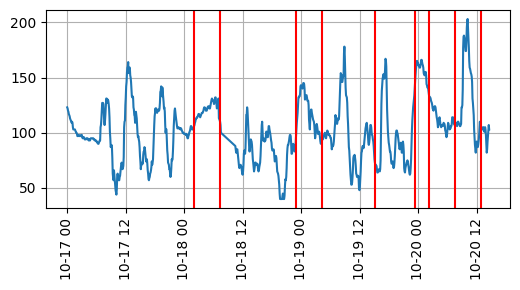

In [41]:
from river.base import drift_detector
from matplotlib import pyplot as plt, gridspec


def plot_data(drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1= plt.subplot(gs[0])
    ax1.grid()
    plt.xticks(rotation=90)
    ax1.plot(data[:1000]['timestamp'].to_list(), data[:1000]['target'].to_list(), label='Stream')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(data[:1000]['timestamp'].to_list()[drift_detected], color='red')
    plt.show()

drifts = []

for i, val in data[:1000].iterrows():
    adwin.update(val[2])   # Data is processed one sample at a time
    if adwin.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

plot_data(drifts)